In [387]:
# Description: We want to first establish a good dataset for training the model. We will attempt to utilize set features for now and implement RFE (Recursive Feature Elimination) to get a set
# of good features later on.    

### **Features to Include**
# Sodium: 309
# Potassium: 308
# Glucose: 300
# Creatinine: 314
# Chloride: 307
# Calcium: 318
# Urea Nitrogen: 315
# Bicarbonate (EC02): 310
# ALB: 303
# TP (Total Protein): 301
# ALKP: 321
# AST: 320
# TBIL: 319
# Creatinine: 324
# ALT: 357

# 324, 320, 357

# 309, 308, 300, 314, 307, 318, 315, 310, 303, 301, 321, 320, 319, 324

In [388]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
import plotly_express as px
import math
from sklearn.model_selection import GridSearchCV

In [389]:
# load dataset
file_path = "C:/Users/rgae/Downloads/76e9275b-0c8b-458c-93dd-8119300c0add.csv"#"C:/Users/rgae/Downloads/76e9275b-0c8b-458c-93dd-8119300c0add.csv"
df = pd.read_csv(file_path, low_memory = True)
df = df.dropna()
df

,model,j_no,zip_file_id,lresultid,ebodyfluid,lassaynumber,srepindexintest,fconcentration,fsihemolysisvalue,fsiturbidityvalue,fsiicterusvalue
30,V4303,76000017,29621367,382.0,6.0,321,0,118.093000,15.0,20.0,2.0000
123,V4303,76000017,30237615,400.0,6.0,308,0,10.012300,15.0,20.0,2.0000
125,V4303,76000017,30237615,403.0,6.0,308,0,9.933890,15.0,20.0,2.0000
239,V4303,76000022,28452989,2261.0,5.0,344,0,6.130040,15.0,20.0,2.0000
240,V4303,76000022,28452989,2261.0,5.0,344,1,5.217440,15.0,20.0,2.0000
...,...,...,...,...,...,...,...,...,...,...,...
9999995,V4303,76000160,27834238,180902.0,5.0,309,0,140.316000,15.0,20.0,2.0626
9999996,V4303,76000160,27834238,180902.0,5.0,314,0,0.558495,15.0,20.0,2.0626
9999997,V4303,76000160,27834238,180902.0,5.0,315,0,15.200900,15.0,20.0,2.0626
9999998,V4303,76000160,27834238,180902.0,5.0,320,0,29.522000,15.0,20.0,2.0626


In [390]:
df_pivot = df.pivot_table(index=['j_no', 'lresultid'], columns='lassaynumber', values = 'fconcentration').reset_index()
df_pivot = df_pivot[[324, 320, 357, 307]]
df_pivot

lassaynumber,324,320,357,307
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1506447,NaN,NaN,NaN,NaN
1506448,NaN,33.83650,14.30030,106.0640
1506449,NaN,17.52380,10.08310,102.1440
1506450,NaN,8.79043,3.64523,99.9577


In [415]:
df_pivot['binary'] = ((df_pivot[324] > np.log2(65)) & (df_pivot[357] > np.log2(8.64)))
df_pivot.to_csv('binary.csv')

In [391]:
# Convert columns to logs (310 bad)
df_pivot[[324, 320, 357, 307]] = np.log2(df_pivot[[324, 320, 357, 307]])
df_pivot = df_pivot.dropna(how='any')
df_pivot

C:\Users\rgae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log2



lassaynumber,324,320,357,307
1473,4.873666,5.001838,4.207932,6.784124
1507,7.951022,7.025306,6.950655,6.841306
1600,5.600630,4.943743,5.489832,6.756370
1714,6.784792,5.945900,6.139083,6.682826
2457,6.029720,4.680077,4.775577,6.711646
...,...,...,...,...
1506364,4.169925,4.275029,4.573902,6.619218
1506418,4.169925,3.410205,3.095290,6.708849
1506424,6.071289,4.011585,2.895070,6.565946
1506426,5.198121,3.965138,3.617463,6.710710


In [392]:
# Range for CK
df_pivot = df_pivot[(df_pivot[324]>=0) & (df_pivot[324]<=np.log2(1600))] # 1600
df_pivot['CK_class'] = pd.cut(df_pivot[324], bins=[np.log2(1), np.log2(38), np.log2(168), np.log2(1600)], labels=['Low', 'Medium', 'High'], include_lowest=True)
# Drop rows with NaN values in CK_class (if any)
df_pivot = df_pivot.dropna(subset=['CK_class'])
# Fix the discrete continuous issue
df_pivot

C:\Users\rgae\AppData\Local\Temp\ipykernel_22220\4032523403.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



lassaynumber,324,320,357,307,CK_class
1473,4.873666,5.001838,4.207932,6.784124,Low
1507,7.951022,7.025306,6.950655,6.841306,High
1600,5.600630,4.943743,5.489832,6.756370,Medium
1714,6.784792,5.945900,6.139083,6.682826,Medium
2457,6.029720,4.680077,4.775577,6.711646,Medium
...,...,...,...,...,...
1506364,4.169925,4.275029,4.573902,6.619218,Low
1506418,4.169925,3.410205,3.095290,6.708849,Low
1506424,6.071289,4.011585,2.895070,6.565946,Medium
1506426,5.198121,3.965138,3.617463,6.710710,Low


In [393]:
# Split data into features (X) and target (y)
X = df_pivot.loc[:, ~df_pivot.columns.isin([324, 'CK_class'])]
y = df_pivot[['CK_class']]

In [394]:
#K FOLD VALIDATION AND  GET AVERAGE ACCURACY SCORE TO CHECK FOR ROBUSTNESS OF MODEL
# Automatic Hyper Parameter techiques - grid search for best depth 
from sklearn.model_selection import KFold

# Define k-fold cross-validation
kf = KFold(n_splits=5)

In [395]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='all', random_state=7) # Define smote here
X, y = oversample.fit_resample(X, y)

# Split the data here
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.4, random_state=7)

In [419]:
# Hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train.value)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train model with best parameters
best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)

# Evaluate best model
y_pred_best = best_rfc.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Model):", accuracy_best)

AttributeError: 'DataFrame' object has no attribute 'value'

In [396]:
rfc = RandomForestClassifier(max_depth=20, random_state=7)

In [397]:
# Average score of the split

acc_score = []
k = 5 # Equal to n_splits

for train_index, test_index in kf.split(X):
    X_train_avg, X_test_avg = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_avg,  y_test_avg = y.iloc[train_index], y.iloc[test_index]


    rfc.fit(X_train_avg, y_train_avg)
    pred_values = rfc.predict(X_test_avg)

    acc = accuracy_score(pred_values, y_test_avg)
    acc_score.append(acc)

avg_acc_score=sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

C:\Users\rgae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\rgae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\rgae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\rgae\AppData\Local\Packages\PythonSoftwa

accuracy of each fold - [0.44811905746176106, 0.5427862753203804, 0.656284454244763, 0.6571113561190739, 0.44652701212789414]
Avg accuracy : 0.5501656310547745


In [398]:
X

lassaynumber,320,357,307
0,5.001838,4.207932,6.784124
1,7.025306,6.950655,6.841306
2,4.943743,5.489832,6.756370
3,5.945900,6.139083,6.682826
4,4.680077,4.775577,6.711646
...,...,...,...
36277,4.102071,4.239026,6.709237
36278,4.131056,4.210351,6.714726
36279,4.510434,4.871222,6.635059
36280,5.372344,4.691669,6.675076


In [399]:
# Random Forest Classifier model
rfc = RandomForestClassifier(max_depth=30, random_state=7)

# Train the model
rfc.fit(X_train, y_train)

y_pred_rfc_test = rfc.predict(X_test)
y_pred_rfc_train = rfc.predict(X_train)


accuracy_test = accuracy_score(y_test, y_pred_rfc_test)
print(f'Accuracy for Testing: {accuracy_test}')
accuracy_train = accuracy_score(y_train, y_pred_rfc_train)
print(f'Accuracy for Training: {accuracy_train}')

print(classification_report(y_test, y_pred_rfc_test))

C:\Users\rgae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for Testing: 0.6306844281120808
Accuracy for Training: 1.0
              precision    recall  f1-score   support

        High       0.65      0.73      0.68      7264
         Low       0.67      0.66      0.67      7293
      Medium       0.56      0.50      0.53      7213

    accuracy                           0.63     21770
   macro avg       0.63      0.63      0.63     21770
weighted avg       0.63      0.63      0.63     21770



In [400]:
dt = DecisionTreeClassifier(max_depth=20, random_state=7)

# Train the model
dt.fit(X_train, y_train)

y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_test)
print(f'Accuracy for Testing: {accuracy_test}')
accuracy_train = accuracy_score(y_train, y_pred_dt_train)
print(f'Accuracy for Training: {accuracy_train}')

print(classification_report(y_test, y_pred_dt_test))

Accuracy for Testing: 0.5589802480477721
Accuracy for Training: 0.9363285556780595
              precision    recall  f1-score   support

        High       0.59      0.61      0.60      7264
         Low       0.60      0.60      0.60      7293
      Medium       0.48      0.47      0.48      7213

    accuracy                           0.56     21770
   macro avg       0.56      0.56      0.56     21770
weighted avg       0.56      0.56      0.56     21770



In [408]:
import statistics

#statistics.mean(estimator.get_depth() for estimator in rfc.estimators_)
# Average mean for depth = 45 ish
Y_test_mean = statistics.mean(y)
print(y_test_mean)

TypeError: can't convert type 'str' to numerator/denominator

In [402]:
# CK distribution showcase
fig = px.histogram(df_pivot[324], title = 'Distribution of CK Values')
fig.update_layout(
    xaxis_title='CK Value', yaxis_title='Frequency'
)
fig.show()

# Glucose distribution showcase
fig1 = px.histogram(df_pivot[320], title = 'Distribution of AST Values')
fig1.update_layout(
    xaxis_title='AST Value', yaxis_title='Frequency'
)
fig1.show()

# ALT distribution showcase
fig2 = px.histogram(df_pivot[357], title = 'Distribution of ALTV Values')
fig2.update_layout(
    xaxis_title='ALTV Value', yaxis_title='Frequency'
)
fig2.show()

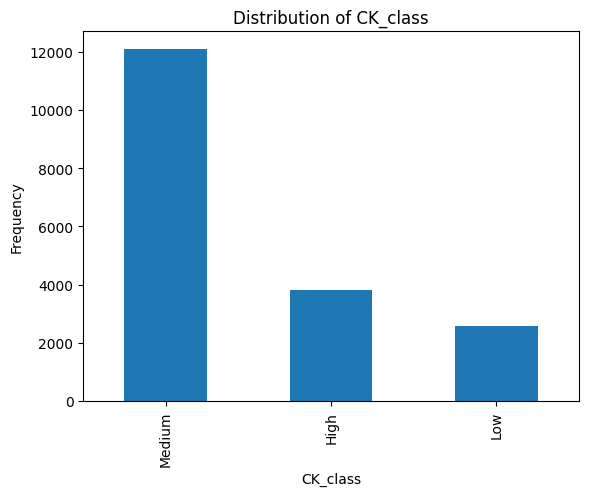

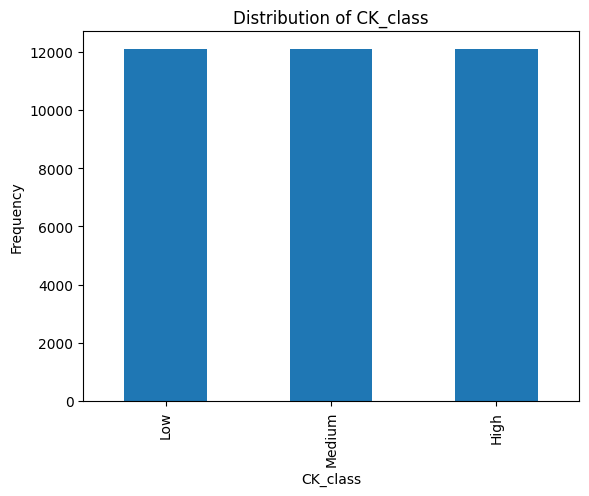

In [403]:
df_pivot['CK_class'].value_counts().plot(kind='bar')
plt.title('Distribution of CK_class')
plt.xlabel('CK_class')
plt.ylabel('Frequency')
plt.show()

y['CK_class'].value_counts().plot(kind='bar')
plt.title('Distribution of CK_class')
plt.xlabel('CK_class')
plt.ylabel('Frequency')
plt.show()

In [404]:
#bootstrap